In [37]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import requests as r
import geopy as gp
import pyarrow as pa


In [38]:
# geojson files

state = "admin_1_state.geojson"
district = "admin_2_district.geojson"

state_gdf = gpd.read_file(state)
district_gdf = gpd.read_file(district)


In [39]:
# call the data from url

hies_state = 'https://storage.dosm.gov.my/hies/hies_state.parquet'

hies_state_df = pd.read_parquet(hies_state)
if 'date' in hies_state_df.columns: hies_state_df['date'] = pd.to_datetime(hies_state_df['date'])

hies_district = 'https://storage.dosm.gov.my/hies/hies_district.parquet'

hies_district_df = pd.read_parquet(hies_district)
if 'date' in hies_district_df.columns: hies_district_df['date'] = pd.to_datetime(hies_district_df['date'])

In [ ]:
hies_state_df

In [41]:
# Merge and convert state columns to lowercase

state_gdf['state'] = state_gdf['state'].str.lower()
hies_state_df['state'] = hies_state_df['state'].str.lower()

state_gdf_combined = state_gdf.merge(hies_state_df, how='left', on='state')


In [42]:
# drop duplicating columns
district_gdf = district_gdf.drop(columns=['state'])

# Merge and convert district columns to lowercase

district_gdf['district'] = district_gdf['district'].str.lower()
hies_district_df['district'] = hies_district_df['district'].str.lower()


district_gdf_combined = district_gdf.merge(hies_district_df, how='left', on='district')

In [62]:
states_gdf_combined = state_gdf_combined.to_crs('urn:ogc:def:crs:OGC:1.3:CRS84')
district_gdf_combined = district_gdf_combined.to_crs('urn:ogc:def:crs:OGC:1.3:CRS84')


In [ ]:
# Create a figure and axis

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

state_gdf_combined.boundary.plot(
    ax=ax,
    linewidth=1.5,
    edgecolor='black',
    facecolor='none')

# Plot the heatmap using the income_mean column
district_gdf_combined.plot(
    column='income_mean',
    ax=ax,
    legend=True,
    legend_kwds={'label': 'Mean Income (RM)',
                'orientation': 'horizontal'},
    missing_kwds={'color': 'lightgrey'},
    cmap='Greens',
    edgecolor='black',
    linewidth=0.5)

# Remove axes
ax.axis('off')

# Add a title
plt.title('Mean Income by District in Malaysia', pad=20)

# plt.tight_layout()
plt.show()

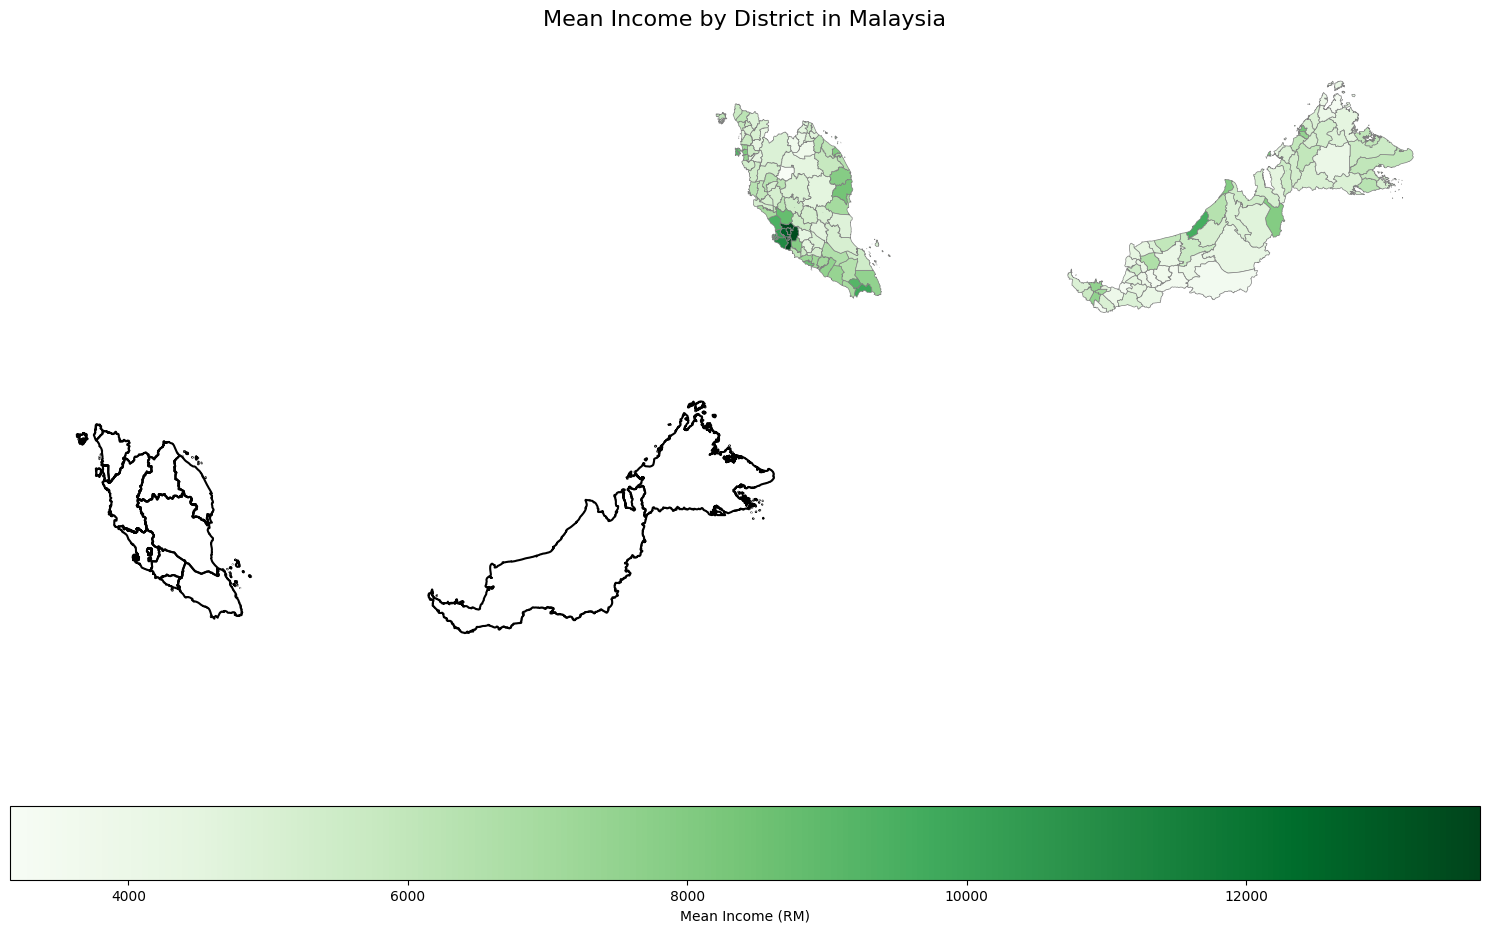

In [64]:
import matplotlib.pyplot as plt

# Ensure both GeoDataFrames use the same CRS. Your code for this is correct.
# states_gdf_combined = state_gdf_combined.to_crs('urn:ogc:def:crs:OGC:1.3:CRS84')
# district_gdf_combined = district_gdf_combined.to_crs('urn:ogc:def:crs:OGC:1.3:CRS84')

# --- Main Plotting Logic ---

# 1. Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# 2. Plot the districts map FIRST (this will be the base layer)
# This sets the colors and the thin district lines.
district_gdf_combined.plot(
    column='income_mean',
    ax=ax,
    legend=True,
    legend_kwds={'label': 'Mean Income (RM)',
                 'orientation': 'horizontal'},
    missing_kwds={'color': 'lightgrey'},
    cmap='Greens',
    edgecolor='gray', # Using gray for district lines to make state lines pop
    linewidth=0.5
)

# 3. Plot the state polygons on TOP (this is the overlay)
# We are plotting the full GeoDataFrame, not just the .boundary
# We make the fill transparent so it doesn't cover the districts.
state_gdf_combined.plot(
    ax=ax,
    facecolor='none',       # CRITICAL: Makes the polygon fill transparent
    edgecolor='black',      # The color of the thicker state border
    linewidth=1.5           # The thicker line for the state boundary
)

# 4. Final Touches
ax.axis('off')
ax.set_title('Mean Income by District in Malaysia', fontsize=16, pad=20)

plt.tight_layout()
plt.show()